In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../..")

from utils_common import EvalData

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Extracting Data

We compare the performance of the pre-traiend model with a PointNetLK model trained, further, on shapenet.real.hard dataset. We compare the performance on

In [2]:
labels = [#"lk-shd (shapenet all)", 
          "trained (modelnet+shapenet.real.hard)",
          #"lk-md (shapenet all)", 
          "pre-trained (modelnet)"]

files = []

# model (Nov28_05-53-37_spark-agent) evaluated on: shapenet.real.hard
# files.append("../runs/Dec04_09-36-52_spark-agent/eval_data.pkl")
files.append("../runs/Dec04_19-22-44_spark-agent/eval_data.pkl")

# model (pre-trained) evaluated on: shapenet.real.hard
files.append("../runs/Dec04_19-21-11_spark-agent/eval_data.pkl")


In [3]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  trained (modelnet+shapenet.real.hard)
loading file:  ../runs/Dec04_19-22-44_spark-agent/eval_data.pkl
label:  pre-trained (modelnet)
loading file:  ../runs/Dec04_19-21-11_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [4]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,trained (modelnet+shapenet.real.hard),pre-trained (modelnet)
adds_th_score,0.173828,0.076172
adds_auc,0.167916,0.099496


Highlights
- shapenet-depth trained model (lk-shd) does better than modelnet trained model (lk-md), on shapenet depth all dataset

## Distribution of Error Metrics

In [5]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [6]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

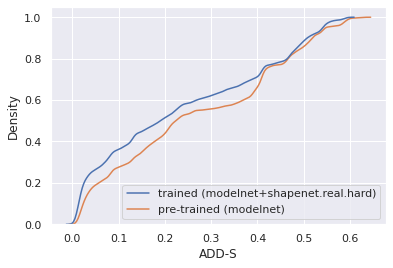

In [7]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [8]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [9]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

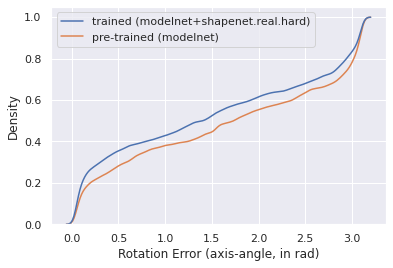

In [10]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [11]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [12]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

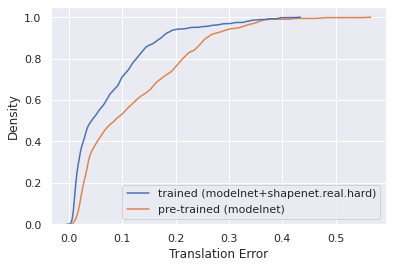

In [13]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')